In [23]:
%pylab inline

# Params
BASEDATADIR = "/storage/mgymrek/gtex-estrs-paper/revision/data/"
BASERESULTSDIR = "/storage/mgymrek/gtex-estrs-paper/revision/results"

# Allow us to edit fonts in Illustrator
import matplotlib
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

# Import libraries
import os
import pandas as pd
import scipy.stats

COLORS = {
    "Artery-Aorta":"salmon",
    "Artery-Tibial": "red",
    "Adipose-Subcutaneous": "darkorange",    
    "Adipose-Visceral":"orange",
    "Brain-Caudate":"lemonchiffon"   , 
    "Brain-Cerebellum":"yellow",
    "Cells-Transformedfibroblasts": "skyblue",
    "Esophagus-Mucosa": "sienna",
    "Esophagus-Muscularis":"burlywood",
    "Heart-LeftVentricle":"darkviolet",
    "Lung": "greenyellow",
    "Muscle-Skeletal": "mediumslateblue",
    "Nerve-Tibial":"gold",
    "Skin-NotSunExposed":"blue",
    "Skin-SunExposed":"cornflowerblue",
    "Thyroid":"green",
    "WholeBlood": "m",
}

############ Set up paths #############
SAVEPLOT = True
PREFIX = "eSTR-calling"
FIGPREFIX = "SuppFig"
DATADIR = os.path.join(BASEDATADIR, PREFIX)
RESULTSDIR = os.path.join(BASERESULTSDIR, PREFIX)

peerfactors = pd.read_csv(os.path.join(DATADIR, "AdiposePeerFactors.tsv"), sep="\t")
subject_cov = pd.read_csv("/storage/resources/datasets/gtex/59533/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v7.p2.c1.GRU/PhenotypeFiles/phs000424.v7.pht002742.v7.p2.c1.GTEx_Subject_Phenotypes.GRU.txt.gz", \
                   sep="\t", quotechar='"', skiprows=10, compression="gzip")
sample_cov = pd.read_csv("/storage/resources/datasets/gtex/59533/PhenoGenotypeFiles/RootStudyConsentSet_phs000424.GTEx.v7.p2.c1.GRU/PhenotypeFiles/phs000424.v7.pht002743.v7.p2.c1.GTEx_Sample_Attributes.GRU.txt.gz", \
                   sep="\t", quotechar='"', skiprows=10, compression="gzip")

Populating the interactive namespace from numpy and matplotlib


/home/mgymrek/.local/lib/python3.4/site-packages/scipy/stats/stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/home/mgymrek/.local/lib/python3.4/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/mgymrek/.local/lib/python3.4/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/mgymrek/.local/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/mgymrek/.local/lib/python3.4/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/mgymrek/.local/lib/python3.4/site-packages/scipy/stats/_distn_infrastruct

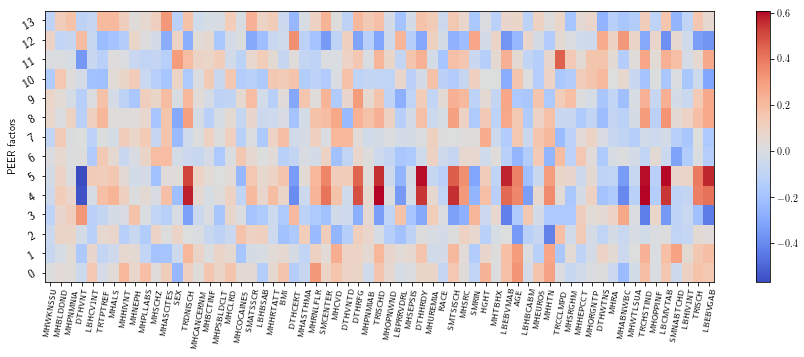

In [21]:
def GetCorr(pdata, column):
    usepeers = ["V%s"%i for i in range(2, 16)]
    return [scipy.stats.spearmanr(pdata[YY].values, pdata[column].values, nan_policy="omit").correlation for YY in usepeers]

def Startswith(item, l):
    for sw in l:
        if item.startswith(sw): return True
    return False

peerfactors.index = sorted([x.replace('.','-') for x in list(peerfactors.index)])
peerfactors["SUBJID"] = peerfactors.index
sample_cov["SUBJID"] = ['-'.join(x.split('-')[:2]) for x in list(sample_cov['SAMPID'])]
peerdata = pd.merge(peerfactors, subject_cov, on=["SUBJID"])
peerdata = pd.merge(sample_cov, peerdata, on=["SUBJID"])
peerdata = peerdata[peerdata["SMGEBTCH"].astype(str).apply(lambda x: "GTEx_" in x )]
peerdata = peerdata.groupby("SAMPID").first()

dfdata = {}
for col in cols:
    try:
        cor = GetCorr(peerdata, col)
        dfdata[col] = cor
    except: continue

df = pd.DataFrame(dfdata)

means = df.apply(np.mean)
plotcols = list(set(list(means[means.apply(abs)>0.02].index) + ["AGE","BMI","SEX","RACE","HGHT"]))

df_plot = df[plotcols]
fig, ax = plt.subplots(figsize=(15,5))

plt.pcolor(df_plot, cmap='coolwarm')

ax.set_xticks(np.arange(df_plot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_plot.shape[0]) + 0.5, minor=False)

labels = list(df_plot.columns)
ax.set_xticklabels(labels, rotation=80, size=8)
ax.set_yticklabels(df_plot.index,rotation=30, size=12)
plt.ylabel('PEER factors')
plt.colorbar()

plt.grid(False)

if SAVEPLOT: fig.savefig(os.path.join(RESULTSDIR, "%s_PEER.pdf"%FIGPREFIX))

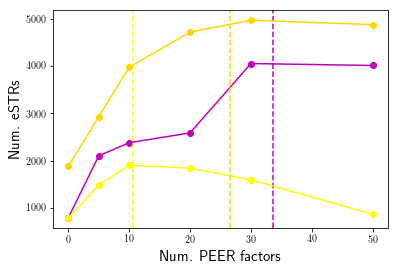

In [35]:
peer_vals = [0, 5, 10, 20, 30, 50]
blood = [790, 2100, 2377, 2585, 4052, 4011]
brain = [786, 1480, 1899, 1839, 1593, 863]
nerve = [1879, 2928, 3975, 4716, 4968, 4875]

blood_samples = 336
nerve_samples = 265
brain_samples = 107

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(peer_vals, blood, color=COLORS["WholeBlood"], marker="o")
ax.axvline(x=blood_samples/10, color=COLORS["WholeBlood"], linestyle="dashed")
ax.plot(peer_vals, brain, color=COLORS["Brain-Cerebellum"], marker="o")
ax.axvline(x=brain_samples/10, color=COLORS["Brain-Cerebellum"], linestyle="dashed")
ax.plot(peer_vals, nerve, color=COLORS["Nerve-Tibial"], marker="o")
ax.axvline(x=nerve_samples/10, color=COLORS["Nerve-Tibial"], linestyle="dashed")
ax.set_xlabel("Num. PEER factors", size=15)
ax.set_ylabel("Num. eSTRs", size=15);
if SAVEPLOT: fig.savefig(os.path.join(RESULTSDIR, "%s_PEERsamples.pdf"%FIGPREFIX))